# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
#!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user
!pip install scikeras
!pip install tensorflow===2.17.1 scikit-learn==1.4.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.25.2 pandas==2.2.2 opencv-python==4.8.0.76 -q --user


In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import seaborn as sns                                                                            # Importing seaborn to plot graphs
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing

# Tensorflow / Keras - all the required sub-modules from Keras
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img                            # Importing the ImageDataGenerator for data augmentation
from keras.models import Sequential, Model, clone_model                                            # Importing the sequential module to define a sequential model
from keras.layers import Input,Conv2D,MaxPooling2D,BatchNormalization,Activation,LeakyReLU,Dropout,SpatialDropout2D,Dense,Flatten   # Defining all the layers to build our CNN Model
from keras.applications.vgg16 import VGG16
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras import losses, optimizers, backend
from keras.optimizers import Adam,SGD, RMSprop                                               # Importing the optimizers which can be used in our model
from keras.utils import to_categorical

from sklearn import preprocessing                                                                   # Importing the preprocessing module to preprocess the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

import numpy as np      # Library for performing numerical computations
import matplotlib.pyplot as plt     # Library for creating and showing plots
import matplotlib.image as mpimg      # Library for reading and showing images
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

keras.utils.set_random_seed(416)  # Set the seed using keras.utils.set_random_seed. This will set: 1) `numpy` seed 2) backend random seed 3) `python` random seed

## Loading the dataset

In [4]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Import and reading the data set
# Load the image file of dataset
images = np.load('/content/drive/My Drive/Kamesh/images.npy')

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/My Drive/Kamesh/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [6]:
print(images.shape)
print(images.dtype)
print(images.ndim)

(4750, 128, 128, 3)
uint8
4


**Observations:**


*   There are 4750 RGB images of shape 128 x 128 X 3 each. As mentioned, each image is an RGB image having 3 channels

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

(4750, 1)

dtype('O')

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
5,Small-flowered Cranesbill
6,Small-flowered Cranesbill
7,Small-flowered Cranesbill
8,Small-flowered Cranesbill
9,Small-flowered Cranesbill


,Label
4730,Loose Silky-bent
4731,Loose Silky-bent
4732,Loose Silky-bent
4733,Loose Silky-bent
4734,Loose Silky-bent
4735,Loose Silky-bent
4736,Loose Silky-bent
4737,Loose Silky-bent
4738,Loose Silky-bent
4739,Loose Silky-bent


,count
Label,
Loose Silky-bent,654
Common Chickweed,611
Scentless Mayweed,516
Small-flowered Cranesbill,496
Fat Hen,475
Charlock,390
Sugar beet,385
Cleavers,287
Black-grass,263


<Axes: xlabel='proportion', ylabel='Label'>

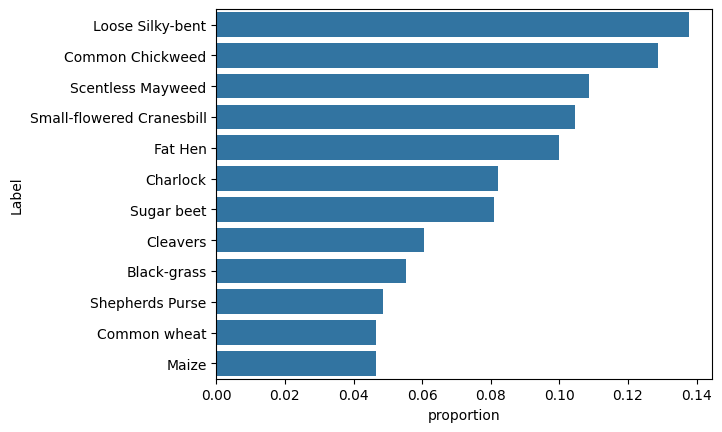

In [7]:
display(labels.shape)
display(labels['Label'].dtype)
display(labels.head(20))  # checking first 20 records;
display(labels.tail(20))  # checking first 20 records;
display(labels.value_counts())  # show counts of plants
sns.countplot(y='Label', data=labels, order=labels['Label'].value_counts().index, stat='proportion') # show the same graphically

**Observations:**


* Data is Highly Imbalanced with difference in counts almost 3 times higher / lower beteween plants
* All Plant has sufficient number of counts in data



**Plotting random images from each of the class**


In [8]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

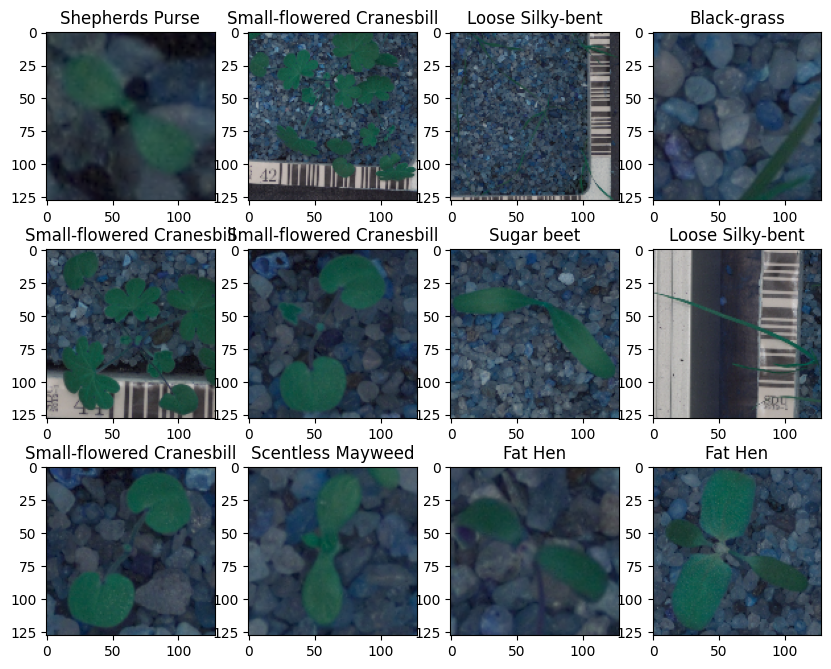

In [9]:
plot_images(images,labels)

**Observations:**

* All pictures in different zoom level -> We might need to try data augmentation with focus on image translation
* No need for cropping as imagees seems to be previosuy cropped
* The green color seems to be the channel with most consistent potential for edge detection / feature extraction
* Brighness and contrast might be challenging to use for edge detections


**Checking the distribution of the target variable**


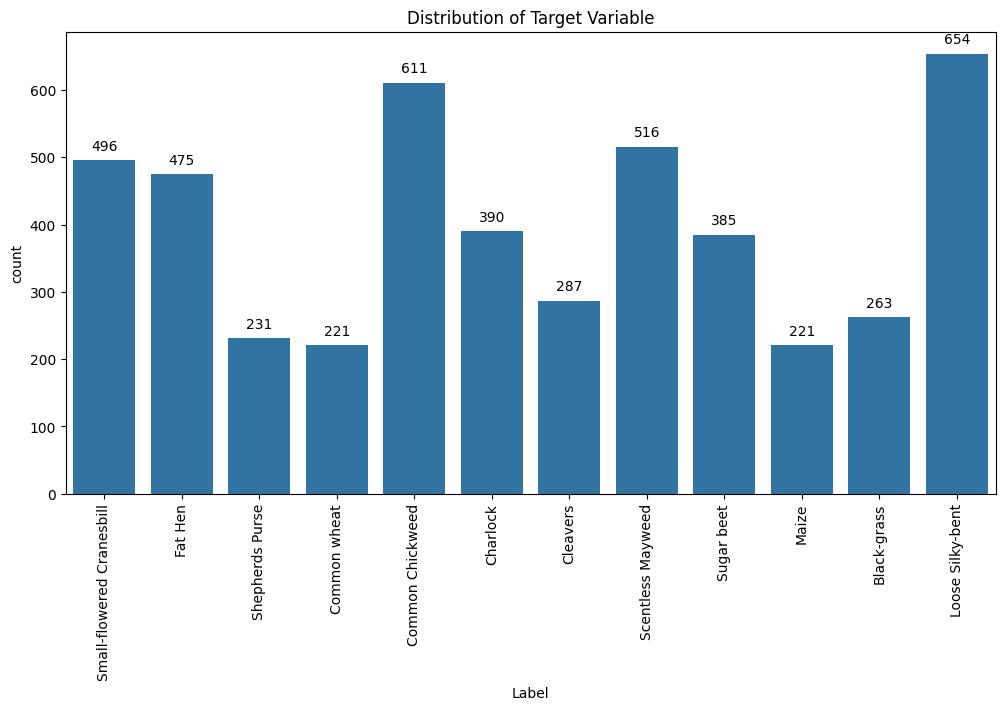

In [10]:
# Plot the distribution of the target variable
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=labels['Label'])

# The x-axis labels are vertical
plt.xticks(rotation='vertical')

# Add a title
plt.title('Distribution of Target Variable')

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

**Observations:**

* As you can see from the above plot, the dataset is unbalanced.
* **Most Frequent Class:** "Loose Silky-bent" with 654 instances. Least Frequent Class: "Maize" and "Common wheat" with 221 instances each.

* **Degree of Imbalance:** The most frequent class ("Loose Silky-bent") has nearly 3 times as many instances as the least frequent classes ("Maize" and "Common wheat"). Other classes like "Black-grass" (263 instances) and "Shepherds Purse" (231 instances) also have fewer instances compared to the more frequent classes.

The distribution is relatively imbalanced, with a noticeable variation between the most and least frequent labels. This imbalance may need to be addressed in the modeling process to prevent bias toward the more frequent classes.

## Data Pre-Processing

### Convert the BGR images to RGB images.

In computer vision, converting images from BGR (Blue, Green, Red) to RGB (Red, Green, Blue) is necessary due to how different image libraries and models handle color channels. Most deep learning frameworks (e.g., TensorFlow, Keras, PyTorch) expect images in RGB format because the pre-trained models like VGG16 were trained on RGB images.

In [11]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [12]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

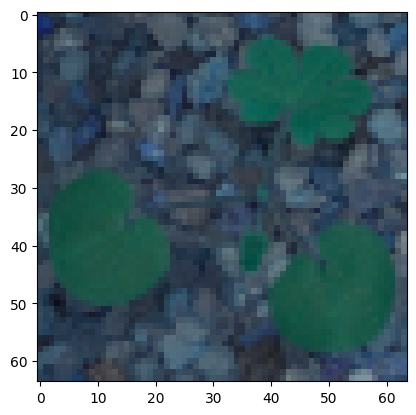

In [13]:
plt.imshow(images_decreased[8])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

* As we have less images in our dataset, we will only use 10% of our data for testing, 10% of our data for validation and 80% of our data for training.
* We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [14]:
# First, split the data into temporary (train + validation) and test sets
X_temp, X_test, y_temp, y_test = train_test_split(
    np.array(images_decreased),
    labels['Label'],            # 'Label' is the target variable
    test_size=0.1,
    random_state=42,
    stratify=labels['Label']     # Stratify based on the label to maintain the distribution
)

# Split the temporary set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.1,
    random_state=42,
    stratify=y_temp             # Stratify based on y_temp to maintain the distribution
)


In [15]:
# Check the shape of train, validation, and test data
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3847, 64, 64, 3) (3847,)
(428, 64, 64, 3) (428,)
(475, 64, 64, 3) (475,)


**Encode the target labels**


We will be using LabelBinarizer for converting categorical labels from names to one hot vector as we are dealing with multiple classes.
Labelbinarizer works similar to onehotencoder





In [18]:
# Initialize the LabelBinarizer
encoder = LabelBinarizer()

# Fit and transform y_train
y_train_encoded = encoder.fit_transform(y_train)

# Transform y_val
y_val_encoded = encoder.transform(y_val)

# Transform y_test
y_test_encoded = encoder.transform(y_test)

In [19]:
# Check the shape of train, validation and test data after encoding
y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape

((3847, 12), (428, 12), (475, 12))

**Data Normalization**

* Since the image pixel values range from 0-255, the normalization method will be scaling - where all the pixel values will be divided by 255 to standardize the images to have values between 0 and 1.

In [20]:
# Complete the code to normalize the image pixels of train, test, and validation data
X_train_normalized = X_train.astype('float32') / 255.0
X_val_normalized = X_val.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

**Data Re-Balancing**

Class and Sample Weights Calcuations



In [21]:
# Calculating class weights
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print("Original class distribution:")
print(class_counts)

# Calculating weights inversely proportional to class frequencies
max_samples = max(counts)
class_weights = {label: max_samples/count for label, count in class_counts.items()}
print("\nClass weights:")
print(class_weights)

# Creating sample weights matching training data order
sample_weights = np.array([class_weights[y] for y in y_train])

Original class distribution:
{'Black-grass': 213, 'Charlock': 316, 'Cleavers': 232, 'Common Chickweed': 495, 'Common wheat': 179, 'Fat Hen': 384, 'Loose Silky-bent': 530, 'Maize': 179, 'Scentless Mayweed': 418, 'Shepherds Purse': 187, 'Small-flowered Cranesbill': 402, 'Sugar beet': 312}

Class weights:
{'Black-grass': 2.488262910798122, 'Charlock': 1.6772151898734178, 'Cleavers': 2.2844827586206895, 'Common Chickweed': 1.0707070707070707, 'Common wheat': 2.9608938547486034, 'Fat Hen': 1.3802083333333333, 'Loose Silky-bent': 1.0, 'Maize': 2.9608938547486034, 'Scentless Mayweed': 1.2679425837320575, 'Shepherds Purse': 2.834224598930481, 'Small-flowered Cranesbill': 1.318407960199005, 'Sugar beet': 1.6987179487179487}


**Model Building**


* First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.
* In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

* Also, let's fix the seed again after clearing the backend.

* Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

**Clearing the backend session**

In [22]:
# Clearing backend
backend.clear_session()

**Initializing the random seed values**

In [23]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

We will build a **CNN Model** with the following 2 main parts -

1. The **Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. The **Fully Connected classification layers** for prediction.

In [24]:
# Initializing a sequential model
model1 = Sequential()

# Adding the first conv layer with 128 filters and kernel size 3x3, padding 'same'
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of the output of the first conv layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Creating two similar convolution and max-pooling layers with activation='relu'
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Flattening the output of the conv layer after max pooling
model1.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation function as softmax
model1.add(Dense(12, activation='softmax'))

# Using the Adam Optimizer
opt = Adam()

# Compiling the model using suitable loss function and metric
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          32,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 128,828 (503.23 KB)

 Trainable params: 128,828 (503.23 KB)

 Non-trainable params: 0 (0.00 B)

**Fitting the model on the train data**



In [25]:
# Fit the model on training data and use validation data for validation
history_1 = model1.fit(
    X_train_normalized, y_train_encoded,
    epochs=50,
    validation_data=(X_val_normalized, y_val_encoded),
    batch_size=32,
    verbose=2
)

Epoch 1/50
121/121 - 11s - 89ms/step - accuracy: 0.1279 - loss: 2.4352 - val_accuracy: 0.2360 - val_loss: 2.2873
Epoch 2/50
121/121 - 1s - 9ms/step - accuracy: 0.2329 - loss: 2.2560 - val_accuracy: 0.3505 - val_loss: 2.0533
Epoch 3/50
121/121 - 1s - 10ms/step - accuracy: 0.2792 - loss: 2.0976 - val_accuracy: 0.3645 - val_loss: 1.9035
Epoch 4/50
121/121 - 1s - 10ms/step - accuracy: 0.2992 - loss: 1.9718 - val_accuracy: 0.3902 - val_loss: 1.7779
Epoch 5/50
121/121 - 1s - 10ms/step - accuracy: 0.2982 - loss: 1.9052 - val_accuracy: 0.4019 - val_loss: 1.6588
Epoch 6/50
121/121 - 1s - 11ms/step - accuracy: 0.3299 - loss: 1.8286 - val_accuracy: 0.4346 - val_loss: 1.5751
Epoch 7/50
121/121 - 1s - 11ms/step - accuracy: 0.3595 - loss: 1.7138 - val_accuracy: 0.4836 - val_loss: 1.4488
Epoch 8/50
121/121 - 1s - 11ms/step - accuracy: 0.3696 - loss: 1.6609 - val_accuracy: 0.4930 - val_loss: 1.4602
Epoch 9/50
121/121 - 2s - 19ms/step - accuracy: 0.3730 - loss: 1.6384 - val_accuracy: 0.4953 - val_loss:

**Model Evaluation**



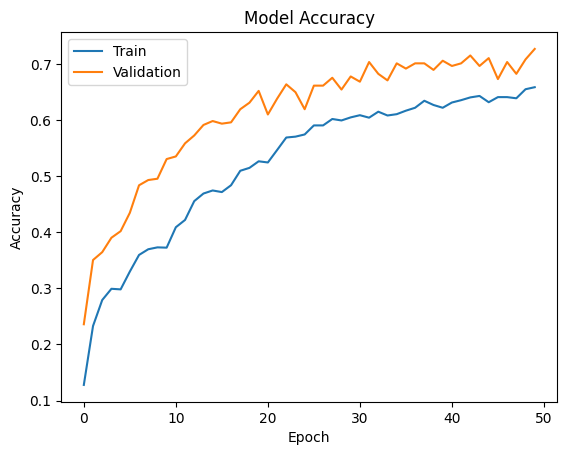

In [26]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**


*   We can see from the above plot that the training accuracy of the model was good but the validation accuracy was not good.
* The model seems to underfit on the data.
*  The model shows improvement in both training and validation accuracy over time, but the gap between the two suggests that the model may still be learning.
* However, the validation accuracy being higher than the training accuracy is somewhat unusual and may suggest that further tuning or evaluation is required, such as adjusting regularization.



**Evaluating the model on test data**


In [27]:
# Evaluate the model on test data
test_accuracy_1 = model1.evaluate(X_test_normalized, y_test_encoded, verbose=1)
print("Test Accuracy: {:.2f}%".format(test_accuracy_1[1] * 100))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.7368 - loss: 0.9950
Test Accuracy: 71.37%


**Generating the predictions using test data**


In [28]:
# Here we would get the output as probablities for each category
y_pred = model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [29]:
y_pred

array([[2.22147585e-23, 1.05878182e-27, 1.89637163e-22, ...,
        5.80960931e-03, 6.38337717e-14, 4.38438796e-08],
       [2.04397097e-14, 1.07996866e-01, 2.52368059e-02, ...,
        2.35555600e-02, 7.62305796e-01, 6.18169419e-02],
       [2.92676929e-12, 4.79262695e-03, 8.19134898e-03, ...,
        7.91115835e-02, 7.73547709e-01, 5.13611063e-02],
       ...,
       [2.31147513e-01, 3.77963348e-18, 1.27003990e-08, ...,
        6.16313505e-14, 8.22895473e-15, 1.87337323e-09],
       [1.06783919e-14, 3.41615367e-14, 7.21375459e-11, ...,
        7.43964361e-03, 1.00349009e-11, 9.77819227e-03],
       [4.94885220e-17, 4.22384263e-12, 4.30663560e-11, ...,
        4.16608214e-01, 9.90095145e-07, 2.35233624e-02]], dtype=float32)

**Plotting the Confusion Matrix**


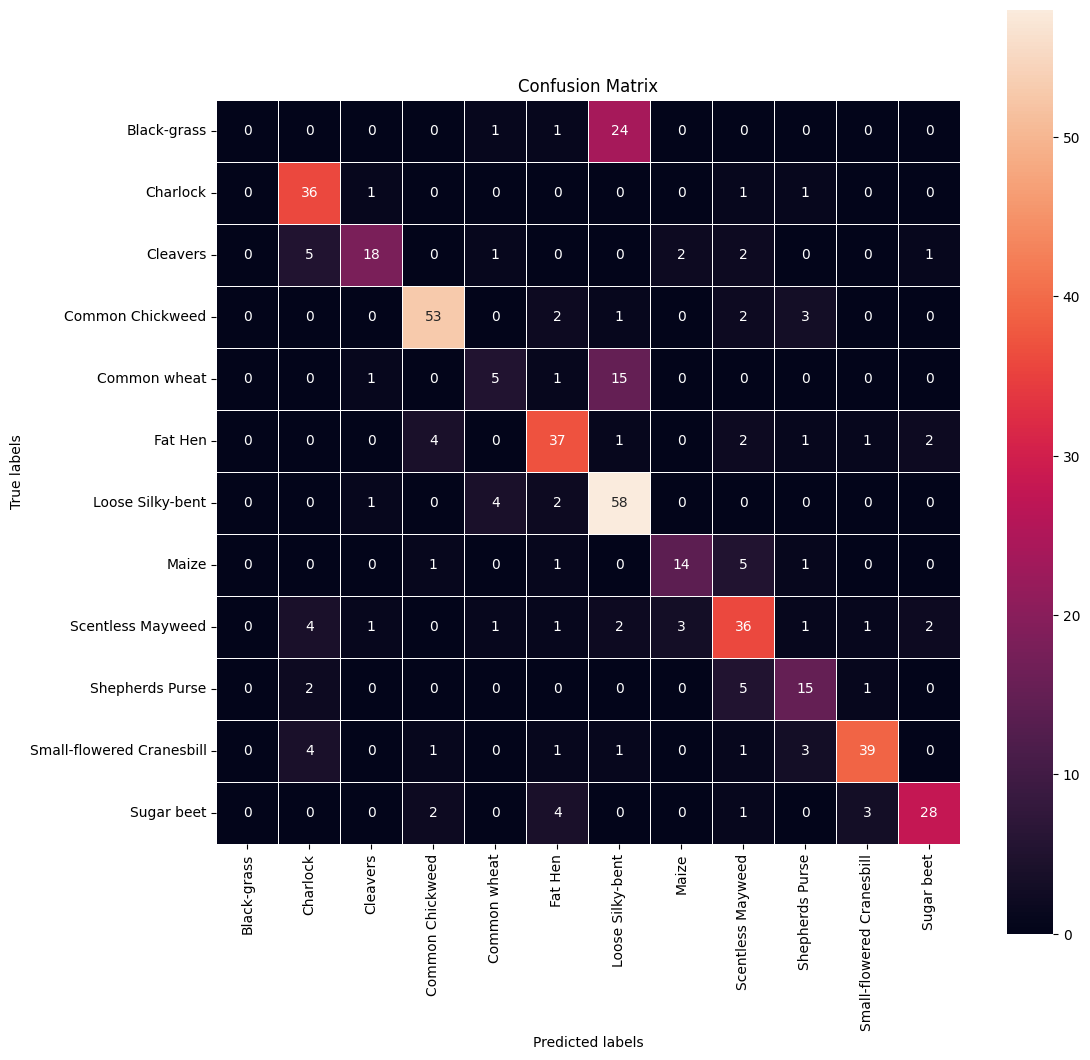

In [30]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Convert the confusion matrix tensor to a numpy array for seaborn heatmap
confusion_matrix = confusion_matrix.numpy()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(encoder.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(encoder.classes_), rotation=0)
plt.show()

**Observations:**

* We observe that most of the classes are not predicted correctly.
* In comparison to the rest, we can see that classes 1 and 10 are well classified.
* The model shows reasonable performance for some classes but struggles with others, likely due to overlapping features or insufficient model complexity.
* Further tuning, or feature engineering might improve performance.


**Plotting Classification Report**



In [31]:
from sklearn import metrics

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.71      0.92      0.80        39
           2       0.82      0.62      0.71        29
           3       0.87      0.87      0.87        61
           4       0.42      0.23      0.29        22
           5       0.74      0.77      0.76        48
           6       0.57      0.89      0.69        65
           7       0.74      0.64      0.68        22
           8       0.65      0.69      0.67        52
           9       0.60      0.65      0.62        23
          10       0.87      0.78      0.82        50
          11       0.85      0.74      0.79        38

    accuracy                           0.71       475
   macro avg       0.65      0.65      0.64       475
weighted avg       0.69      0.71      0.69       475



**Observations:**

* The model performs reasonably well overall but faces challenges with certain underrepresented classes (0, 4, etc).
*  Further tuning or addressing class imbalance could improve performance.

**Model Performance Improvement**


**Reducing the Learning Rate:**

**The ReduceLROnPlateau()** function is used to decrease the learning rate by a specified factor when the model's loss stops improving for a certain period. This can help the model continue to minimize the loss at a smaller learning rate. If the loss still doesn't decrease, the function may be triggered again, reducing the learning rate further in an attempt to achieve a lower loss.

In [32]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

**Data Augmentation**

**Data augmentation** is a technique used in computer vision, to artificially increase the size and diversity of a training dataset by applying various transformations to the original data. These transformations can include operations such as rotating, flipping, scaling, cropping, or adding noise to images, which helps the model generalize better by learning from more varied examples.
By creating different variations of the same data, augmentation reduces overfitting and improves the model's robustness, especially when the available dataset is limited or imbalanced.

**Note:** Data augmentation will not be used in the validation/test data set.

In [33]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [34]:
# Image data generator
train_datagen = ImageDataGenerator(
    rotation_range=30,
    fill_mode='nearest'
)

In [35]:
# Initializing a sequential model
model2 = Sequential()

# Adding the first conv layer with 64 filters and kernel size 3x3, padding 'same'
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of the first conv layer
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding additional convolutional layers
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))

# Adding additional convolutional layers
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(BatchNormalization())

# Flattening the output of the conv layer after max pooling
model2.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
model2.add(Dense(32, activation='relu'))

# Adding dropout with dropout_rate=0.2
model2.add(Dropout(0.2))

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Adding dropout with dropout_rate=0.3
model2.add(Dropout(0.3))

# Adding the output layer with 12 neurons and activation function as softmax
model2.add(Dense(12, activation='softmax'))

# Initializing Adam Optimizer
opt = Adam()

# Compiling the model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,612 (482.86 KB)

 Trainable params: 123,548 (482.61 KB)

 Non-trainable params: 64 (256.00 B)

**Fitting the model on the train data**



In [36]:
# Epochs
epochs = 50

# Batch size
batch_size = 64

# Fit the model on training data with data augmentation
history_2 = model2.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded,
                       batch_size=batch_size,
                       shuffle=True),  # Set shuffle to True to shuffle the training data
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]  # Add the learning rate reduction callback
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - accuracy: 0.1450 - loss: 2.4520 - val_accuracy: 0.1355 - val_loss: 2.4241 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2500 - loss: 2.1571 - val_accuracy: 0.1285 - val_loss: 2.4255 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.3016 - loss: 2.1789 - val_accuracy: 0.1542 - val_loss: 2.3783 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2969 - loss: 2.0221 - val_accuracy: 0.1682 - val_loss: 2.3841 - learning_rate: 0.0010
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.3548 - loss: 1.9269 - val_accuracy: 0.2407 - val_loss: 2.2860 - learning_rate: 0.0010
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4375 - loss: 1.6615 - val_accuracy: 0.2547 - val_loss: 2.2844 - learning_rate: 0.0010
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.4103 - loss: 1.7024 - val_acc

**Model Evaluation**



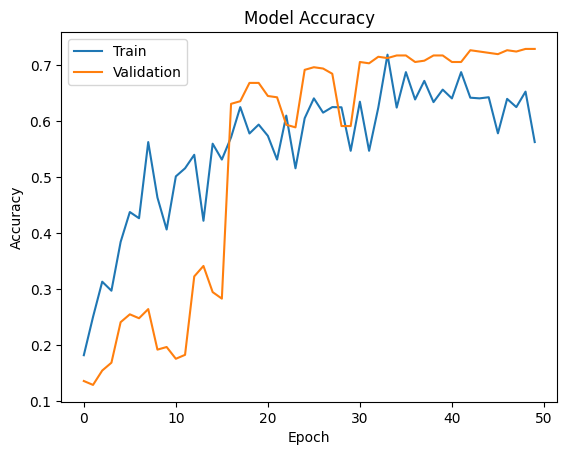

In [37]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:

* The accuracy on the training set is consistently higher than the accuracy on the validation set, especially in the earlier epochs. This indicates that the model is overfitting to the training data, learning its patterns too well and struggling to generalize to unseen data. It seems that the validation accuracy might have started to plateau or decrease after around 25 epochs.

* Overall, the plot suggests that the model needs further tuning or modification to improve its performance on unseen data.

In [38]:
# Evaluate the model on the training data
accuracy_train = model2.evaluate(X_train_normalized, y_train_encoded, verbose=1)

# Evaluate the model on the validation data
accuracy_val = model2.evaluate(X_val_normalized, y_val_encoded, verbose=1)

# Create a dictionary to store results
results_dict = {
    'Dataset': ['Training', 'Validation'],
    'Loss': [accuracy_train[0], accuracy_val[0]],
    'Accuracy': [accuracy_train[1], accuracy_val[1]]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7638 - loss: 0.7324
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7250 - loss: 0.8547
      Dataset      Loss  Accuracy
0    Training  0.753027  0.754614
1  Validation  0.884066  0.728972


**Evaluate the model on test data**



In [39]:
# Evaluate the model on the test data
test_accuracy_2 = model2.evaluate(X_test_normalized, y_test_encoded, verbose=1)

# Print the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy_2[1] * 100))

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.7325 - loss: 0.7973
Test Accuracy: 72.21%


**Generating the predictions using test data**


In [40]:
# Predict the output probabilities for each category
y_pred = model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [41]:
y_pred

array([[1.3698419e-08, 8.1524632e-08, 1.5151105e-06, ..., 4.9449932e-03,
        1.0570007e-04, 4.7111305e-04],
       [3.4155426e-06, 2.4594128e-01, 2.1383036e-02, ..., 4.4024039e-02,
        6.7547989e-01, 7.6460000e-04],
       [7.6958684e-05, 6.9536448e-02, 2.9763648e-02, ..., 1.1641543e-01,
        7.0538205e-01, 2.1182723e-02],
       ...,
       [2.8711537e-01, 6.9133885e-04, 1.4215396e-03, ..., 2.0722420e-05,
        9.5538417e-06, 5.6503701e-05],
       [7.2042087e-05, 9.9777738e-03, 7.3589627e-03, ..., 7.8163311e-02,
        5.3372192e-03, 3.8280317e-03],
       [4.8084366e-03, 4.7869377e-02, 6.1864097e-02, ..., 1.4519076e-01,
        3.5870421e-01, 1.5838669e-01]], dtype=float32)

**Plotting the Confusion Matrix**



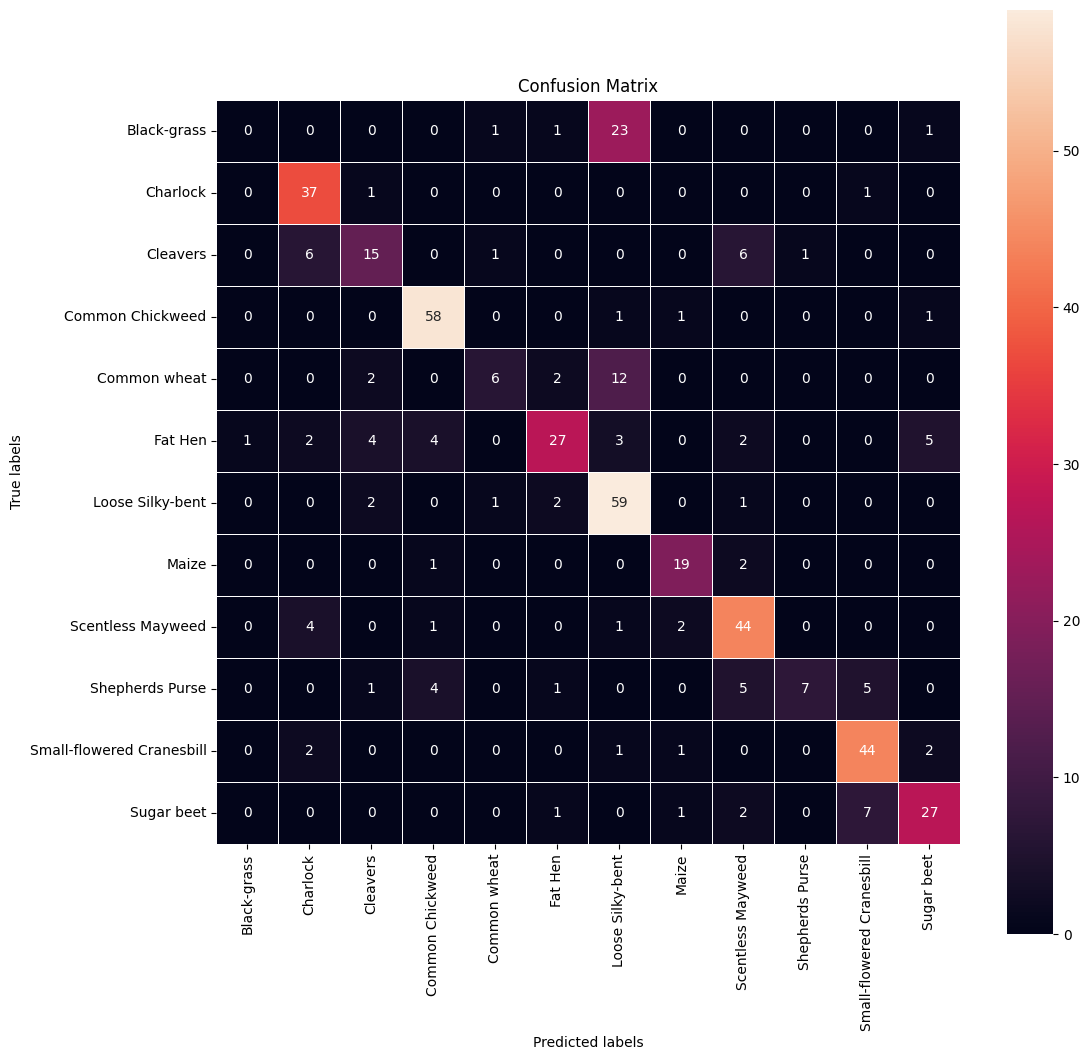

In [42]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Convert the confusion matrix tensor to a numpy array for seaborn heatmap
confusion_matrix = confusion_matrix.numpy()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(encoder.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(encoder.classes_), rotation=0)
plt.show()

**Observation:**

* The confusion matrix appears to be improving.
* We can observe that this model has outperformed our previous model.
* The confusion matrix shows that the model often confuses "Black-grass" with "Loose Silky-bent." It is observed that a higher number of correct predictions for the majority class and a lower number for the minority classes.

**Plotting Classification Report**



In [43]:
from sklearn import metrics

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.73      0.95      0.82        39
           2       0.60      0.52      0.56        29
           3       0.85      0.95      0.90        61
           4       0.67      0.27      0.39        22
           5       0.79      0.56      0.66        48
           6       0.59      0.91      0.72        65
           7       0.79      0.86      0.83        22
           8       0.71      0.85      0.77        52
           9       0.88      0.30      0.45        23
          10       0.77      0.88      0.82        50
          11       0.75      0.71      0.73        38

    accuracy                           0.72       475
   macro avg       0.68      0.65      0.64       475
weighted avg       0.70      0.72      0.69       475



**Transfer Learning using VGG16**

* Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

* For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


**Clearing the backend session**

In [44]:
# Clearing backend
backend.clear_session()

**Initializing the random seed values**

In [45]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [46]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten, Input

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [48]:
model3 = Sequential()

# Add the input layer to define the input shape
model3.add(Input(shape=(64, 64, 3)))

# Adding the convolutional part of the VGG16 model from above
model3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model3.add(Flatten())

# Adding a dense output layer
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.3))

model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,300 (56.64 MB)

 Trainable params: 133,612 (521.92 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [49]:
# Epochs
epochs = 50

# Batch size
batch_size = 64

# Fit the model on training data with data augmentation
history_3 = model3.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded,
                       batch_size=batch_size,
                       shuffle=True),  # Set shuffle to True to shuffle the training data
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]  # Add the learning rate reduction callback
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 18s 198ms/step - accuracy: 0.1642 - loss: 2.4264 - val_accuracy: 0.3154 - val_loss: 2.1509 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2344 - loss: 2.2963 - val_accuracy: 0.3084 - val_loss: 2.1462 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.2739 - loss: 2.1206 - val_accuracy: 0.3715 - val_loss: 1.8694 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3906 - loss: 1.8430 - val_accuracy: 0.3645 - val_loss: 1.8661 - learning_rate: 0.0010
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 97ms/step - accuracy: 0.3586 - loss: 1.8854 - val_accuracy: 0.4322 - val_loss: 1.7684 - learning_rate: 0.0010
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3906 - loss: 1.8324 - val_accuracy: 0.4252 - val_loss: 1.7720 - learning_rate: 0.0010
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.3833 - loss: 1.7794 - val_acc

**Model Evaluation**

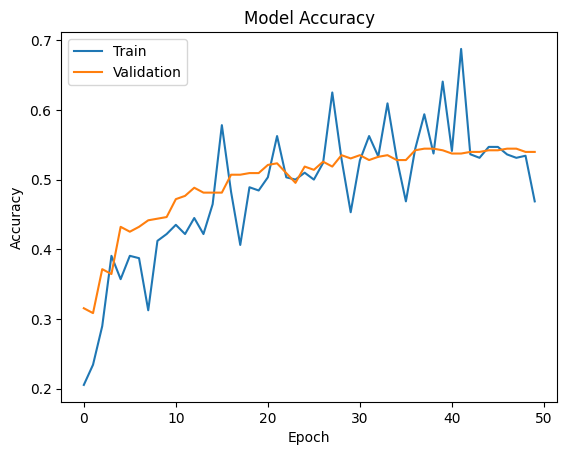

In [50]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
# Evaluate the model on the training data
accuracy_train = model3.evaluate(X_train_normalized, y_train_encoded, verbose=1)

# Evaluate the model on the validation data
accuracy_val = model3.evaluate(X_val_normalized, y_val_encoded, verbose=1)

# Create a dictionary to store results
results_dict = {
    'Dataset': ['Training', 'Validation'],
    'Loss': [accuracy_train[0], accuracy_val[0]],
    'Accuracy': [accuracy_train[1], accuracy_val[1]]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6074 - loss: 1.1486
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5463 - loss: 1.3075
      Dataset      Loss  Accuracy
0    Training  1.145007  0.606966
1  Validation  1.315632  0.539720


**Evaluate the model on test data**



In [52]:
# Evaluate the model on the test data
test_accuracy_3 = model3.evaluate(X_test_normalized, y_test_encoded, verbose=1)

# Print the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy_3[1] * 100))

15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.5419 - loss: 1.3173
Test Accuracy: 53.47%


**Generating the predictions using test data**

In [53]:
# Predict the output probabilities for each category
y_pred = model3.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step


In [54]:
y_pred

array([[2.1636899e-04, 8.2404370e-04, 1.2431461e-03, ..., 1.2296429e-01,
        2.3376456e-02, 7.6884325e-03],
       [3.4753064e-04, 2.9825813e-01, 5.9084747e-02, ..., 2.3356793e-02,
        2.8597611e-01, 3.3343218e-02],
       [8.1665011e-04, 1.1661147e-01, 4.3568589e-02, ..., 1.2986150e-01,
        4.1854873e-01, 3.6723364e-02],
       ...,
       [2.3440255e-01, 2.0594303e-04, 4.0684817e-03, ..., 4.2479700e-05,
        7.5278754e-06, 4.9866812e-04],
       [1.9336713e-02, 5.8865873e-03, 2.4213852e-02, ..., 1.6174471e-02,
        7.0505617e-03, 5.2600786e-02],
       [1.4734366e-03, 2.2933716e-01, 5.6167617e-02, ..., 7.1526907e-02,
        4.3640852e-01, 2.2465799e-02]], dtype=float32)

**Plotting the Confusion Matrix**



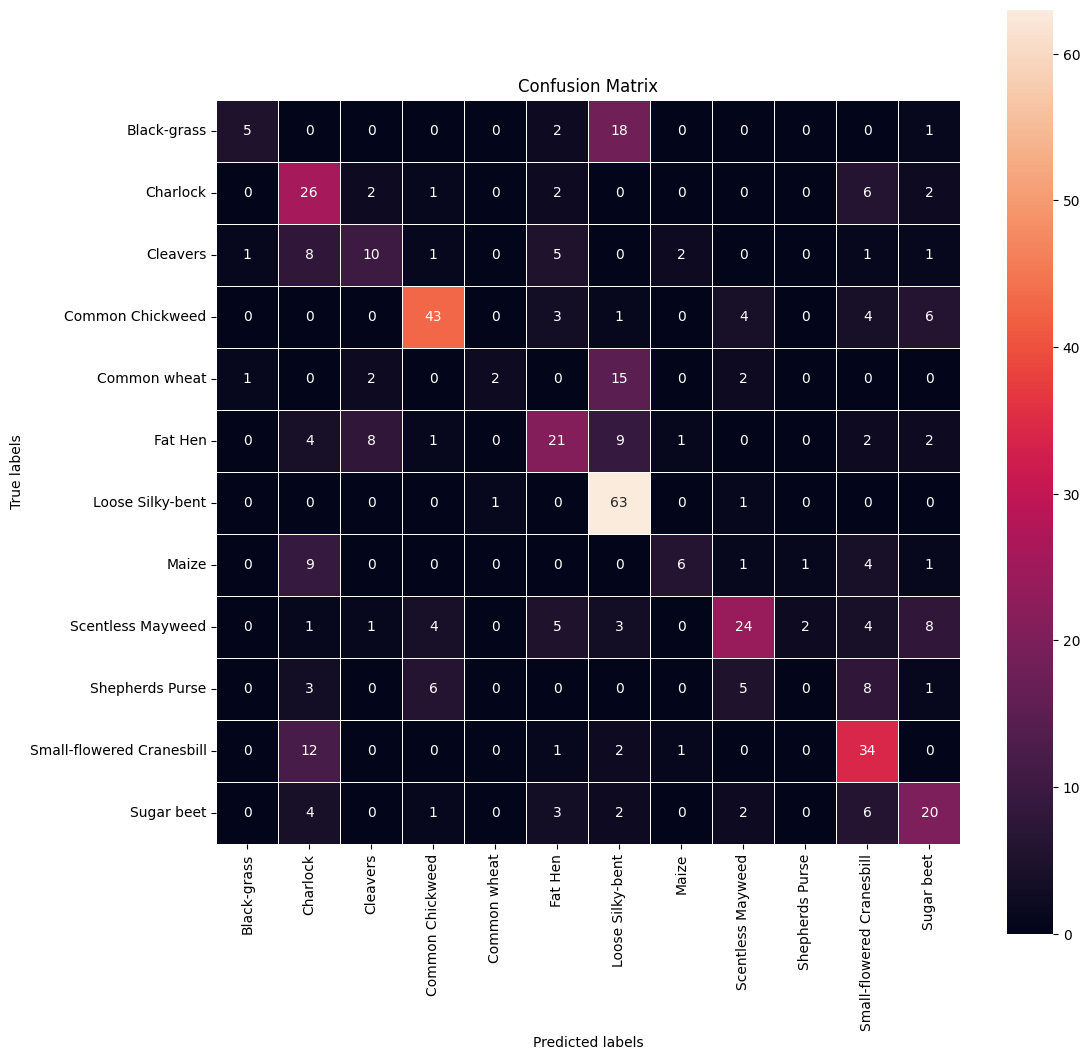

In [55]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Convert the confusion matrix tensor to a numpy array for seaborn heatmap
confusion_matrix = confusion_matrix.numpy()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(encoder.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(encoder.classes_), rotation=0)
plt.show()

**Observations:**

* The confusion matrix appears to be improving.
* We can observe that this model has outperformed our previous model.
* The confusion matrix shows that the model often confuses "Loose Silky-bent" with "Black-grass". This model classifies the classes better than the previous model for all categories.

**Plotting Classification Report**



In [56]:
from sklearn import metrics

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.19      0.30        26
           1       0.39      0.67      0.49        39
           2       0.43      0.34      0.38        29
           3       0.75      0.70      0.73        61
           4       0.67      0.09      0.16        22
           5       0.50      0.44      0.47        48
           6       0.56      0.97      0.71        65
           7       0.60      0.27      0.38        22
           8       0.62      0.46      0.53        52
           9       0.00      0.00      0.00        23
          10       0.49      0.68      0.57        50
          11       0.48      0.53      0.50        38

    accuracy                           0.53       475
   macro avg       0.52      0.45      0.43       475
weighted avg       0.54      0.53      0.50       475



**Transfer Learning using MobileNet**

* Let's try again, but this time, we will be using the idea of Transfer Learning. We will be loading a pre-built MobileNet model, which was trained on the ImageNet dataset that better suited for smaller input sizes.

* For training MobileNet, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with Fully Connected layers created specifically for our problem.


**Clearing the backend session**




In [57]:
# Clearing backend
backend.clear_session()

**Initializing the random seed values**

In [58]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [59]:
from keras.applications import MobileNet
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input

# Load MobileNet model with input shape 64x64x3
# Define the input shape explicitly using Input layer
input_tensor = Input(shape=(64, 64, 3))
mobile_model = MobileNet(weights='imagenet', include_top=False, input_tensor=input_tensor)

# Freeze the layers of MobileNet to prevent them from training
for layer in mobile_model.layers:
    layer.trainable = False

# Add your own layers and fine-tune the model
model4 = Sequential()
# Add the input layer to define the input shape
model4.add(Input(shape=(64, 64, 3)))
model4.add(mobile_model)

# Adding custom layers
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.2))

# Output layer with 12 classes
model4.add(Dense(12, activation='softmax'))

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model4.summary()

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional)      │ (None, 2, 2, 1024)          │       3,228,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,493,884 (13.33 MB)

 Trainable params: 265,020 (1.01 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [60]:
# Epochs
epochs = 50

# Batch size
batch_size = 64

# Fit the model on training data with data augmentation
history_4 = model4.fit(
    train_datagen.flow(X_train_normalized, y_train_encoded,
                       batch_size=batch_size,
                       shuffle=True),  # Set shuffle to True to shuffle the training data
    epochs=epochs,
    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
    validation_data=(X_val_normalized, y_val_encoded),
    verbose=1,
    callbacks=[learning_rate_reduction]  # Add the learning rate reduction callback
)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - accuracy: 0.0964 - loss: 2.4973 - val_accuracy: 0.1776 - val_loss: 2.4070 - learning_rate: 0.0010
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1875 - loss: 2.3940 - val_accuracy: 0.1799 - val_loss: 2.4050 - learning_rate: 0.0010
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.2021 - loss: 2.3452 - val_accuracy: 0.2874 - val_loss: 2.2259 - learning_rate: 0.0010
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1562 - loss: 2.2935 - val_accuracy: 0.2850 - val_loss: 2.2220 - learning_rate: 0.0010
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.2445 - loss: 2.2284 - val_accuracy: 0.3224 - val_loss: 2.0856 - learning_rate: 0.0010
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3281 - loss: 2.1130 - val_accuracy: 0.3248 - val_loss: 2.0824 - learning_rate: 0.0010
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.2768 - loss: 2.0973 - val_acc

**Model Evaluation**

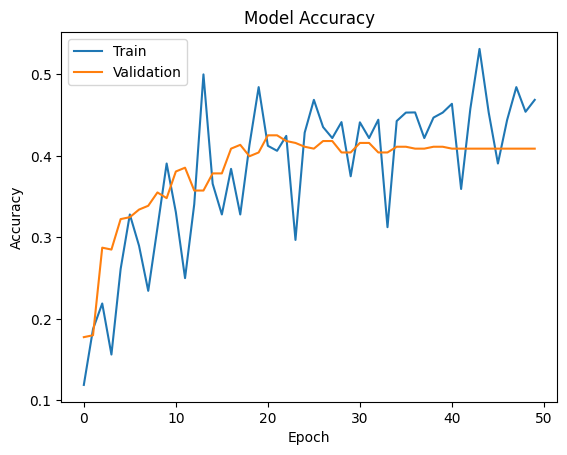

In [61]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:**

* The accuracy on the training set is consistently higher than the accuracy on the validation set, especially in the later epochs. This indicates that the model is overfitting to the training data, learning its patterns too well and struggling to generalize to new, unseen data.
* It seems that the validation accuracy might have started to plateau or decrease after around 25 epochs.
* The model might be too complex for the given dataset. Simplifying the model, such as reducing the number of layers or neurons, could help prevent overfitting.

**Overall, the plot suggests that the model needs further tuning or modification to improve its performance on unseen data.**

In [62]:
# Evaluate the model on the training data
accuracy_train = model4.evaluate(X_train_normalized, y_train_encoded, verbose=2)

# Evaluate the model on the validation data
accuracy_val = model4.evaluate(X_val_normalized, y_val_encoded, verbose=2)

# Create a dictionary to store results
results_dict = {
    'Dataset': ['Training', 'Validation'],
    'Loss': [accuracy_train[0], accuracy_val[0]],
    'Accuracy': [accuracy_train[1], accuracy_val[1]]
}

# Convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame(results_dict)

# Display the DataFrame
print(results_df)

121/121 - 6s - 46ms/step - accuracy: 0.5292 - loss: 1.4391
14/14 - 0s - 9ms/step - accuracy: 0.4089 - loss: 1.7236
      Dataset      Loss  Accuracy
0    Training  1.439081  0.529244
1  Validation  1.723574  0.408879


**Evaluate the model on test data**



In [63]:
# Evaluate the model on the test data
test_accuracy_4 = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

# Print the accuracy
print("Test Accuracy: {:.2f}%".format(test_accuracy_4[1] * 100))

15/15 - 4s - 238ms/step - accuracy: 0.4463 - loss: 1.7194
Test Accuracy: 44.63%


**Generating the predictions using test data**

In [64]:
# Predict the output probabilities for each category
y_pred = model4.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step


In [65]:
y_pred

array([[1.68126877e-02, 1.26642920e-02, 5.77303059e-02, ...,
        3.74028347e-02, 1.81564055e-02, 5.10091186e-02],
       [5.11143636e-03, 6.44604638e-02, 1.06313042e-01, ...,
        3.50132063e-02, 1.01304762e-01, 5.31744622e-02],
       [6.14782330e-03, 2.06503451e-01, 1.15855947e-01, ...,
        6.79364428e-02, 3.48552644e-01, 2.69896779e-02],
       ...,
       [2.05318272e-01, 2.64581438e-04, 1.18964716e-04, ...,
        8.87149596e-04, 7.50646650e-05, 2.92120571e-03],
       [6.58818632e-02, 2.38741711e-02, 5.89143299e-02, ...,
        7.90418461e-02, 5.99170253e-02, 7.26067573e-02],
       [3.66595834e-02, 9.06760320e-02, 4.71795909e-02, ...,
        3.90248857e-02, 9.62375998e-02, 1.12708233e-01]], dtype=float32)

**Plotting the Confusion Matrix**



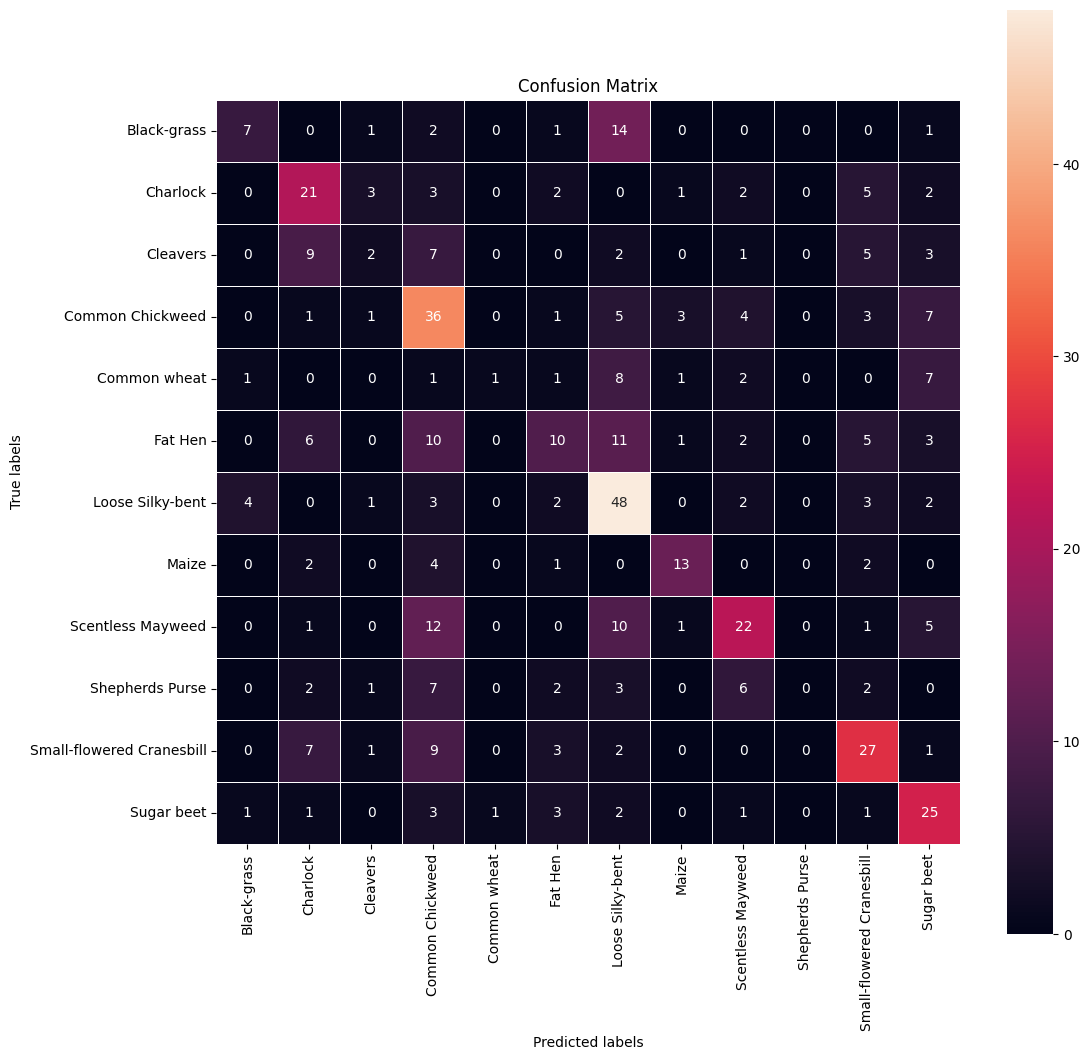

In [66]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Plotting the Confusion Matrix
confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)

# Convert the confusion matrix tensor to a numpy array for seaborn heatmap
confusion_matrix = confusion_matrix.numpy()

f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)

# Setting the labels to both the axes
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(list(encoder.classes_), rotation=90)
ax.yaxis.set_ticklabels(list(encoder.classes_), rotation=0)
plt.show()

**Observations:**

* The confusion matrix show that the model often confuses "Charlock" with "Common Chickweed" and "Fat Hen" with "Loose Silky-bent." The performance of this model seems lesser than the previous model.

**Plotting Classification Report**



In [67]:
from sklearn import metrics

# Obtain the categorical values from y_test_encoded and y_pred
y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
cr = metrics.classification_report(y_test_arg, y_pred_arg)

# Print the classification report
print(cr)

              precision    recall  f1-score   support

           0       0.54      0.27      0.36        26
           1       0.42      0.54      0.47        39
           2       0.20      0.07      0.10        29
           3       0.37      0.59      0.46        61
           4       0.50      0.05      0.08        22
           5       0.38      0.21      0.27        48
           6       0.46      0.74      0.56        65
           7       0.65      0.59      0.62        22
           8       0.52      0.42      0.47        52
           9       0.00      0.00      0.00        23
          10       0.50      0.54      0.52        50
          11       0.45      0.66      0.53        38

    accuracy                           0.45       475
   macro avg       0.42      0.39      0.37       475
weighted avg       0.42      0.45      0.41       475



**Final Model**


In [68]:
# Dictionary to store accuracy results for each model
model_performance = {}
model_performance['Model1: Simple CNN model'] = {
    'Train Accuracy': history_1.history['accuracy'][-1] * 100,
    'Validation Accuracy': history_1.history['val_accuracy'][-1] * 100,
    'Test Accuracy': test_accuracy_1[1] * 100
}
model_performance['Model2: Tuned CNN model'] = {
    'Train Accuracy': history_2.history['accuracy'][-1] * 100,
    'Validation Accuracy': history_2.history['val_accuracy'][-1] * 100,
    'Test Accuracy': test_accuracy_2[1] * 100
}
model_performance['Model3: Transfer Learning VGG16'] = {
    'Train Accuracy': history_3.history['accuracy'][-1] * 100,
    'Validation Accuracy': history_3.history['val_accuracy'][-1] * 100,
    'Test Accuracy': test_accuracy_3[1] * 100
}
model_performance['Model4: Transfer learning MobileNet'] = {
    'Train Accuracy': history_4.history['accuracy'][-1] * 100,
    'Validation Accuracy': history_4.history['val_accuracy'][-1] * 100,
    'Test Accuracy': test_accuracy_4[1] * 100
}

# Convert the dictionary to a DataFrame for comparison
performance_df = pd.DataFrame(model_performance).T  # Transpose to make models rows and metrics columns

# Format the values to display as percentages with two decimal places
performance_df = performance_df.applymap(lambda x: f"{x:.2f}%")

# Display the DataFrame
performance_df

,Train Accuracy,Validation Accuracy,Test Accuracy
Model1: Simple CNN model,65.84%,72.66%,71.37%
Model2: Tuned CNN model,56.25%,72.90%,72.21%
Model3: Transfer Learning VGG16,46.88%,53.97%,53.47%
Model4: Transfer learning MobileNet,46.88%,40.89%,44.63%


**Observations:**


* From the table, It can be seen that the tuned CNN model with Augmented data, using learning reduction
* This model has the highest accuracy for both validation and test data, making it the best performing model overall.



**Final Performance:**


**Visualizing the prediction**


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


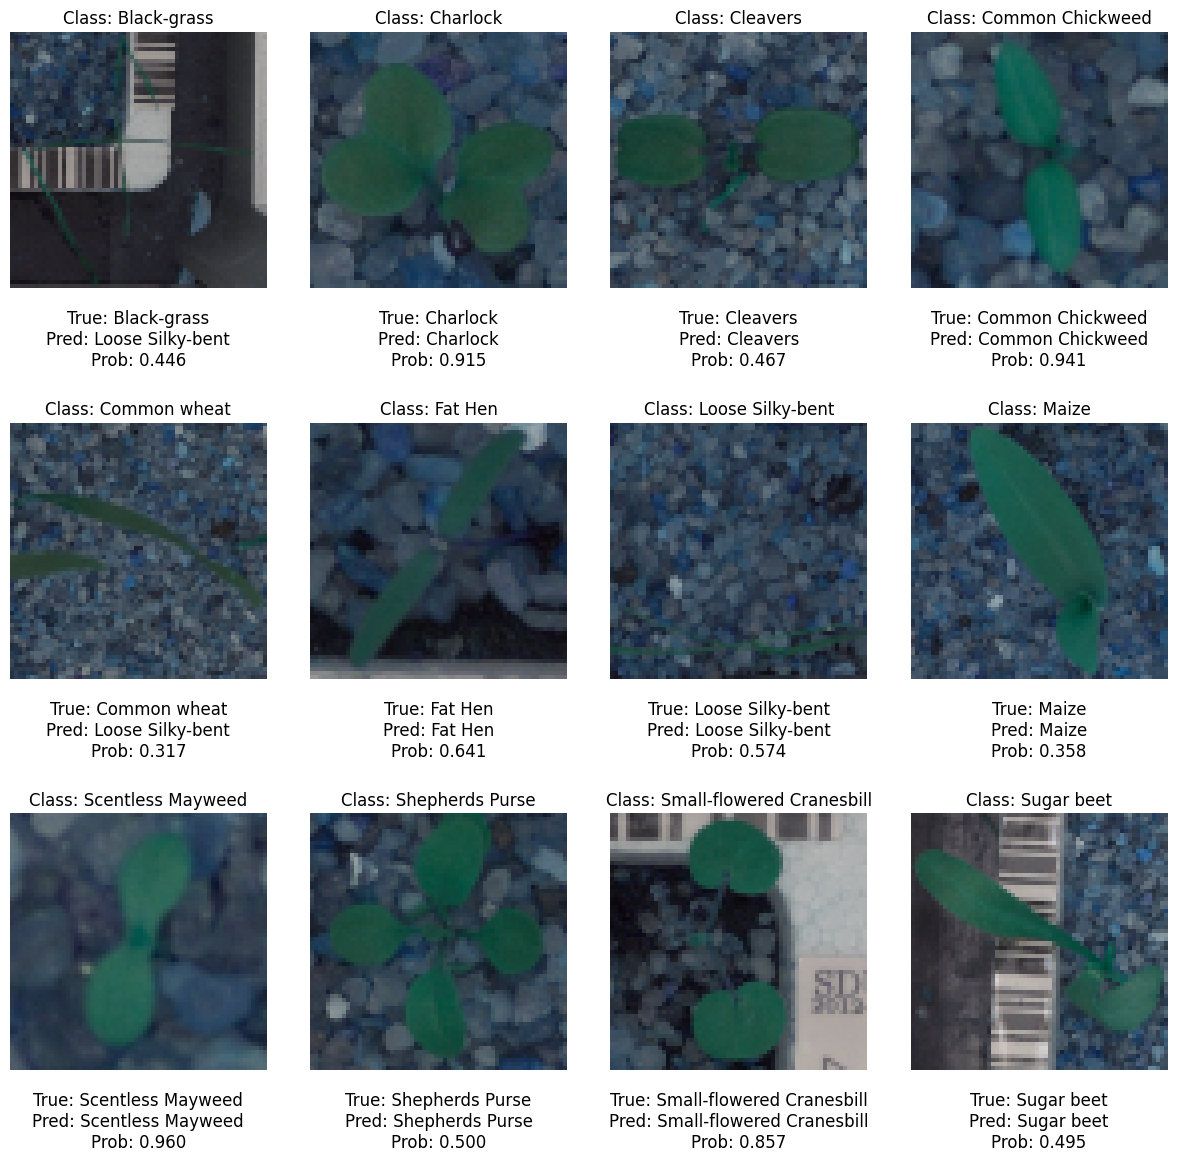

In [73]:
def display_random_images_with_probabilities_per_class(columns=4):
    # Get the total number of classes
    num_classes = len(encoder.classes_)

    # Calculate the number of rows needed to display images in 4 columns
    rows = num_classes // columns + int(num_classes % columns != 0)

    # Create a subplot with the specified number of rows and columns
    fig, axes = plt.subplots(rows, columns, figsize=(12, rows * 4))

    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for class_index in range(num_classes):
        # Get the indices of all images belonging to the current class
        class_indices = np.where(np.argmax(y_test_encoded, axis=1) == class_index)[0]

        # Randomly select one image from the current class
        random_image_index = random.choice(class_indices)

        # Display the image on the current subplot
        ax = axes[class_index]
        ax.imshow(X_test[random_image_index])
        ax.set_title(f'Class: {encoder.classes_[class_index]}')
        ax.axis('off')  # Hide axis

        # Predict the probabilities for the given image
        prediction = model2.predict(X_test_normalized[random_image_index].reshape(1, 64, 64, 3))

        # Get the predicted class and corresponding probability
        predicted_class = np.argmax(prediction, axis=1)[0]
        predicted_probability = prediction[0][predicted_class]

        # Get the true label
        true_label = encoder.classes_[class_index]

        # Get the predicted label
        predicted_label = encoder.classes_[predicted_class]

        # Add the labels and predicted probability as text
        ax.text(0.5, -0.3, f'True: {true_label}\nPred: {predicted_label}\nProb: {predicted_probability:.3f}',
                size=12, ha="center", transform=ax.transAxes)

    # Hide any remaining empty subplots if the number of classes is not a multiple of the number of columns
    for i in range(num_classes, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function
display_random_images_with_probabilities_per_class()

**Actionable Insights and Business Recommendations**


**Key Insights from the Analysis**


**Model Performance:** The final model achieved significant accuracy levels, demonstrating strong classification capabilities for most plant categories. However, some categories (e.g., Black-grass and Maize) showed higher misclassification rates due to similarities in visual features.

**Class Imbalance:** Analysis revealed imbalances in the dataset, with certain categories like Loose Silky-bent having significantly more samples compared to others such as Maize and Shepherd's Purse. Addressing this imbalance through weighted losses and class-specific sampling improved model performance.

**Optimization Strategies:** Techniques such as learning rate adjustments (ReduceLROnPlateau) were crucial in enhancing the model's ability to generalize. Additionally, the use of spatial dropout layers helped mitigate overfitting.



**Implications for Agriculture**

**Enhanced Decision-Making:** The model's ability to classify seedlings with high accuracy enables farmers to make informed decisions about plant health and weed management.

**Labor Efficiency:** By automating seedling identification, significant reductions in manual effort can be achieved, allowing workers to focus on more strategic tasks.

**Sustainability Practices:** Accurate seedling classification aids in targeted application of resources (e.g., fertilizers and pesticides), minimizing waste and promoting sustainable agricultural practices.

**Business Recommendations**


**Deployment Strategy:** Develop a mobile or web-based platform where farmers can upload seedling images for real-time classification. Expand the model's dataset by incorporating images from diverse geographical regions to ensure robustness across climates and terrains.

**Collaborations and Partnerships:** Partner with agricultural research institutions to enhance the dataset and validate the model. Collaborate with tech companies specializing in IoT devices to integrate the classification system into automated farming tools.

* Achieving an accuracy of around 72% on the test data, this model effectively reduces the time and effort needed for seedling identification.

* With more data, further tuning could improve the model's performance and accuracy.

* Data Augmentation has also helped in improving the model.

* Simply employing data augmentation can produce a better outcome than any ordinary CNN.

* Integrating the model into automated weeding systems would enable precise targeting of weeds over crops, reducing pesticide usage and promoting more sustainable farming practices.

* A mobile app for farmers could help them quickly identify unknown plants, supporting faster decision-making in the field.

* These models can be further improved by training with different filter sizes and different number of filters.

* These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64.

**Next Steps**


**Real-World Testing:** Conduct field trials with farmers to assess model performance under practical conditions and refine as needed.

**Dataset Expansion:** Address data scarcity for underrepresented classes by incorporating more samples and using synthetic data generation techniques.

**Continuous Improvement:** Maintain the model with regular updates from new datasets and incorporate user feedback to enhance usability and accuracy.


By implementing these recommendations, this project can transform into a scalable and useful solution that would drive efficiency and sustainability in agriculture.